In [ ]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
#store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


In [ ]:
#get the number of trading days
df.shape

(5044, 7)

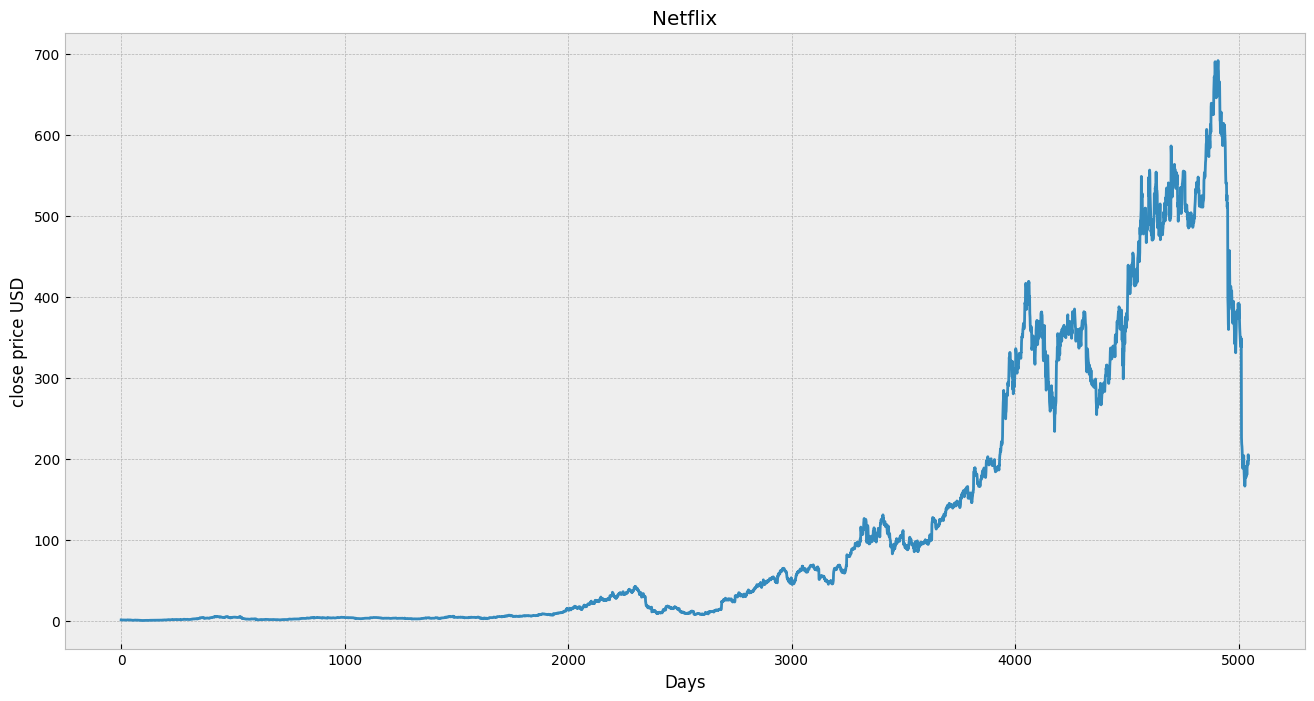

In [ ]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
#get the close price
df = df[['Close']]
df.head(5000)

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429
...,...
4995,373.850006
4996,378.510010
4997,391.820007
4998,381.470001


In [ ]:
#create avaliable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
5040,197.440002,NaN
5041,192.910004,NaN
5042,205.089996,NaN
5043,198.979996,NaN


In [ ]:
#create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [198.399994]
 [188.539993]
 [199.520004]]


<ipython-input-17-d6e72b9a1e2d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [ ]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  0.999286   1.027857   1.172857 ... 192.910004 205.089996 198.979996]


In [ ]:
#split the data into 75% traning and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'lx' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-21-53d349c66b9c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[375.709991],
       [373.850006],
       [378.51001 ],
       [391.820007],
       [381.470001],
       [374.589996],
       [373.470001],
       [391.5     ],
       [380.149994],
       [368.350006],
       [362.149994],
       [355.880005],
       [348.      ],
       [344.100006],
       [350.429993],
       [341.130005],
       [337.859985],
       [348.609985],
       [226.190002],
       [218.220001],
       [215.520004],
       [209.910004],
       [198.399994],
       [188.539993],
       [199.520004]])

In [ ]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[190.360001  199.460007  199.869995  204.009995  188.320007  189.6849975
 173.100006  177.660004  368.350006  174.309998  187.639999  186.509995
 190.559998  361.459991  329.540009  186.350006  187.440002  180.339996
 187.830002  191.399994  195.190002  257.950012  184.210007  165.949997
 196.229996 ]

[373.00931518 371.17528374 375.77026373 388.89453785 378.68895209
 371.90494819 370.80058119 388.57899611 377.38736399 365.75202875
 359.63852948 353.45602963 345.68597937 341.84040448 348.08206513
 338.9118458  335.68745447 346.28745286 225.57567401 217.71688352
 215.0545613  209.52284121 198.17343773 188.45101961 199.27781951]


<ipython-input-29-35e535ef1cf2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


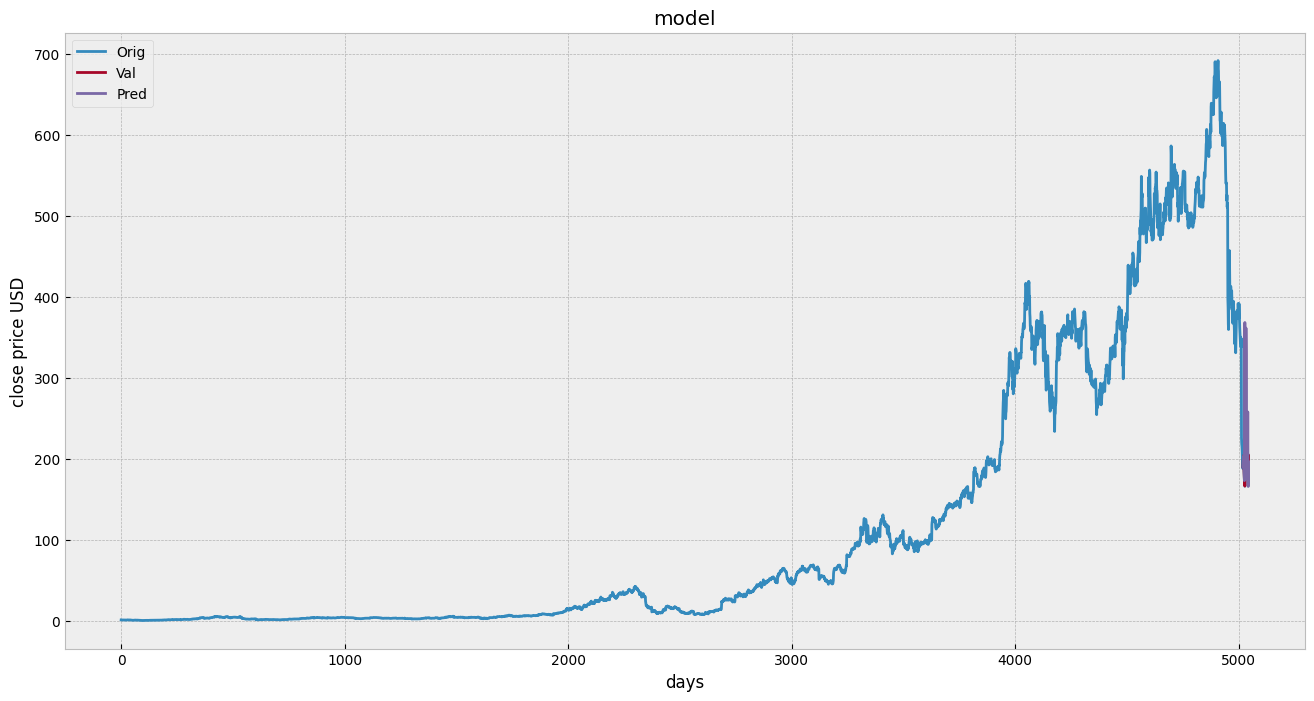

In [ ]:
#visualize the data
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-30-0b26a7b478ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


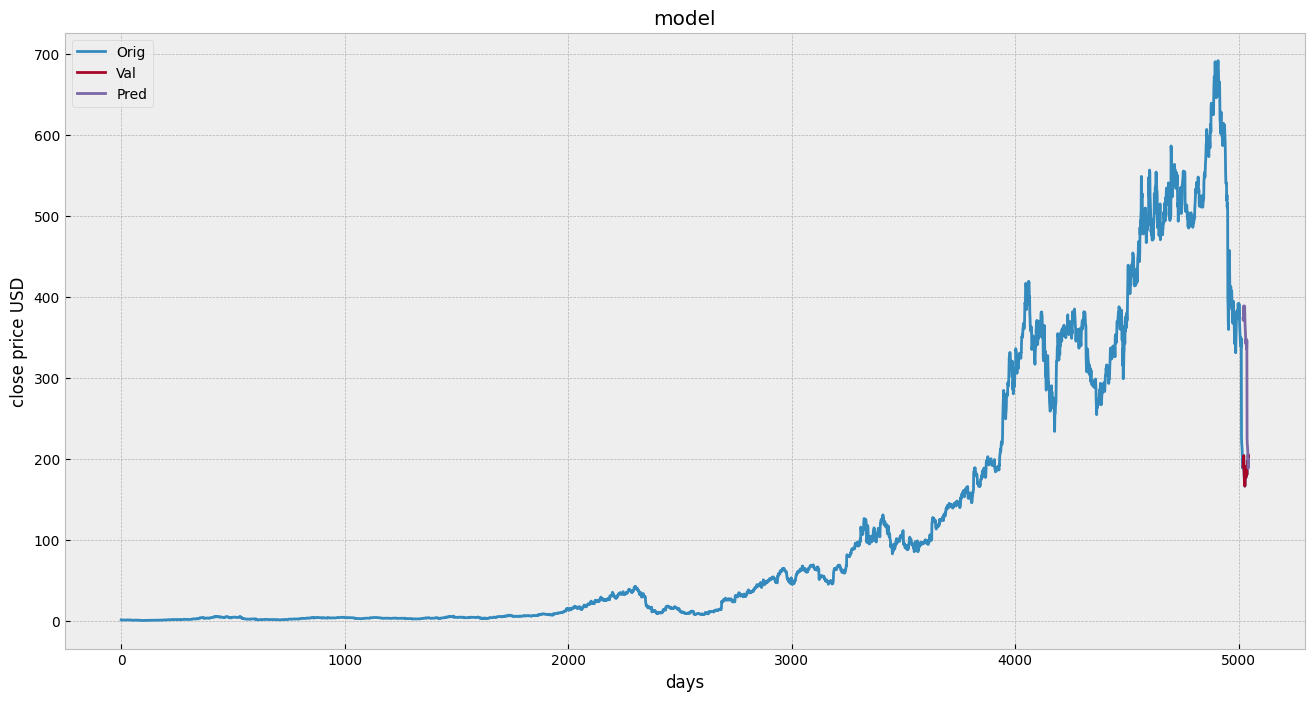

In [ ]:
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()